In [132]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram

## Solving Currency Arbitrage problem using TSP. 
## In TSP, we do find the the minimum route a salesman should travel. 
## So in Currency Arbitrage pproblem, we can define it as a maximization problem. 
## Currency can be considered as a city, and value can be considered as a distance between cities. 
## Hence, we can maximize the traversal of currencies, to ge the maximum profit out of transactions. 

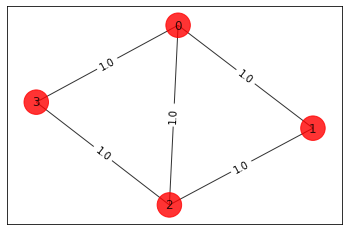

In [133]:
n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [138]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
# result = exact.solve(qp)
# print(result)

optimal function value: 202.0
optimal value: [1. 0. 0. 0. 1. 0. 0. 0. 1.]
status: SUCCESS


In [140]:
# algorithm_globals.random_seed = 123
# seed = 10598
# backend = Aer.get_backend("aer_simulator_statevector")
# quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

### TSP

distance
 [[ 0. 48. 91.]
 [48.  0. 63.]
 [91. 63.  0.]]


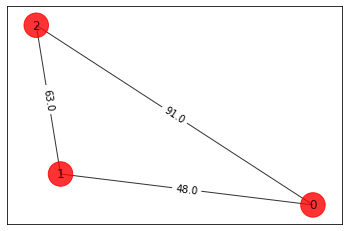

In [143]:
n = 3
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_matrix(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

order = (0, 1, 2) Distance = 202.0
Best order from brute force = (0, 1, 2) with total distance = 202.0


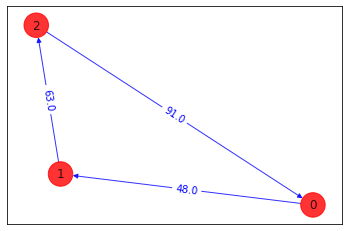

In [144]:
from itertools import permutations


def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order


best_distance, best_order = brute_force_tsp(adj_matrix, n)
print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
)


def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


draw_tsp_solution(tsp.graph, best_order, colors, pos)

In [145]:
qp = tsp.to_quadratic_program()
print(qp)
# print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: TSP

Minimize
 obj: [ 96 x_0_0*x_1_1 + 96 x_0_0*x_1_2 + 182 x_0_0*x_2_1 + 182 x_0_0*x_2_2
      + 96 x_0_1*x_1_0 + 96 x_0_1*x_1_2 + 182 x_0_1*x_2_0 + 182 x_0_1*x_2_2
      + 96 x_0_2*x_1_0 + 96 x_0_2*x_1_1 + 182 x_0_2*x_2_0 + 182 x_0_2*x_2_1
      + 126 x_1_0*x_2_1 + 126 x_1_0*x_2_2 + 126 x_1_1*x_2_0 + 126 x_1_1*x_2_2
      + 126 x_1_2*x_2_0 + 126 x_1_2*x_2_1 ]/2
Subject To
 c0: x_0_0 + x_0_1 + x_0_2 = 1
 c1: x_1_0 + x_1_1 + x_1_2 = 1
 c2: x_2_0 + x_2_1 + x_2_2 = 1
 c3: x_0_0 + x_1_0 + x_2_0 = 1
 c4: x_0_1 + x_1_1 + x_2_1 = 1
 c5: x_0_2 + x_1_2 + x_2_2 = 1

Bounds
 0 <= x_0_0 <= 1
 0 <= x_0_1 <= 1
 0 <= x_0_2 <= 1
 0 <= x_1_0 <= 1
 0 <= x_1_1 <= 1
 0 <= x_1_2 <= 1
 0 <= x_2_0 <= 1
 0 <= x_2_1 <= 1
 0 <= x_2_2 <= 1

Binaries
 x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2
End



In [146]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offsett = qubo.to_ising()
offset = -1*offsett
# qubitOp, offset = -1*qubitOpp, -offsett
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -7581.0
Ising Hamiltonian:
-1290.0 * ZIIIIIIII
- 1290.0 * IZIIIIIII
+ 606.5 * ZZIIIIIII
- 1290.0 * IIZIIIIII
+ 606.5 * ZIZIIIIII
+ 606.5 * IZZIIIIII
- 1268.5 * IIIZIIIII
+ 606.5 * ZIIZIIIII
+ 15.75 * IZIZIIIII
+ 15.75 * IIZZIIIII
- 1268.5 * IIIIZIIII
+ 15.75 * ZIIIZIIII
+ 606.5 * IZIIZIIII
+ 15.75 * IIZIZIIII
+ 606.5 * IIIZZIIII
- 1268.5 * IIIIIZIII
+ 15.75 * ZIIIIZIII
+ 15.75 * IZIIIZIII
+ 606.5 * IIZIIZIII
+ 606.5 * IIIZIZIII
+ 606.5 * IIIIZZIII
- 1282.5 * IIIIIIZII
+ 606.5 * ZIIIIIZII
+ 22.75 * IZIIIIZII
+ 22.75 * IIZIIIZII
+ 606.5 * IIIZIIZII
+ 12.0 * IIIIZIZII
+ 12.0 * IIIIIZZII
- 1282.5 * IIIIIIIZI
+ 22.75 * ZIIIIIIZI
+ 606.5 * IZIIIIIZI
+ 22.75 * IIZIIIIZI
+ 12.0 * IIIZIIIZI
+ 606.5 * IIIIZIIZI
+ 12.0 * IIIIIZIZI
+ 606.5 * IIIIIIZZI
- 1282.5 * IIIIIIIIZ
+ 22.75 * ZIIIIIIIZ
+ 22.75 * IZIIIIIIZ
+ 606.5 * IIZIIIIIZ
+ 12.0 * IIIZIIIIZ
+ 12.0 * IIIIZIIIZ
+ 606.5 * IIIIIZIIZ
+ 606.5 * IIIIIIZIZ
+ 606.5 * IIIIIIIZZ


In [147]:
result = exact.solve(qubo)
print(result)

optimal function value: 202.0
optimal value: [1. 0. 0. 0. 1. 0. 0. 0. 1.]
status: SUCCESS


energy: -7379.0
tsp objective: -14960.0
feasible: True
solution: [0, 1, 2]
solution objective: 202.0


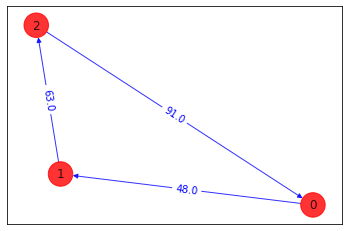

In [148]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("tsp objective:", result.eigenvalue.real + offset)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [149]:
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("qasm_simulator")
quantum_instancee = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)
# print(quantum_instance)


energy: -7326.024699521843
time: 5.425633430480957
feasible: True
solution: [1, 2, 0]
solution objective: 202.0


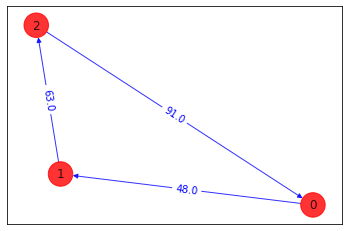

In [150]:
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

result = vqe.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [151]:
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("qasm_simulator")
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

optimal function value: 202.0
optimal value: [0. 0. 1. 1. 0. 0. 0. 1. 0.]
status: SUCCESS
solution: [1, 2, 0]
solution objective: 202.0


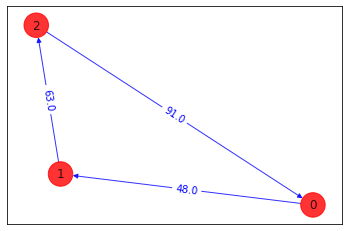

In [152]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result)

z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)